In [1]:
from google.colab import drive # importing data from google drive


In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd # importing pandas


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning /air_quality_2.csv')# reading data as pandas dataframe

In [5]:
data.head() # checking the column of data

,PM10,SO2,NO2,AirQuality Index
0,20.0,6.00,12.00,Good
1,38.5,4.75,10.25,Good
2,30.0,5.75,12.75,Good
3,26.5,4.00,8.62,Good
4,20.5,5.00,10.75,Good


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PM10              99 non-null     float64
 1   SO2               99 non-null     float64
 2   NO2               99 non-null     float64
 3   AirQuality Index  99 non-null     object 
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


In [6]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.preprocessing import LabelEncoder # Importing Label Encoder

In [8]:
encoder = LabelEncoder()# setting up insatnces

In [9]:
data['AirQuality_encoded'] = encoder.fit_transform(data['AirQuality Index']) # Transforming the target column into binary values

In [10]:
data.head() # checking the column

,PM10,SO2,NO2,AirQuality Index,AirQuality_encoded
0,20.0,6.00,12.00,Good,0
1,38.5,4.75,10.25,Good,0
2,30.0,5.75,12.75,Good,0
3,26.5,4.00,8.62,Good,0
4,20.5,5.00,10.75,Good,0


In [11]:
from sklearn.model_selection import train_test_split # Importing train test split

In [12]:
data.columns # checking the columns

Index(['PM10', 'SO2', 'NO2', 'AirQuality Index', 'AirQuality_encoded'], dtype='object')

In [13]:
X= data[['PM10', 'SO2', 'NO2']]

In [ ]:
X.shape

(99, 3)

In [14]:
y= data['AirQuality_encoded']

In [ ]:
y.shape

(99,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # Perforing train test split

In [16]:
from sklearn.svm import SVC # Importing Support Vector Machine


In [17]:
model = SVC() # setting instances

In [18]:
model.fit(X_train,y_train) # fitting data

SVC()

In [19]:
predictions = model.predict(X_test) # predicting the model on test data

In [20]:
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
print(confusion_matrix(y_test,predictions))


[[15  0]
 [ 1  4]]


In [22]:
print (classification_report(y_test,predictions)) # model evalution. The model had 95% accuracy

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           2       1.00      0.80      0.89         5

    accuracy                           0.95        20
   macro avg       0.97      0.90      0.93        20
weighted avg       0.95      0.95      0.95        20



,PM10,SO2,NO2,AirQuality Index,AirQuality_encoded
0,20.00,6.00,12.00,Good,0
1,38.50,4.75,10.25,Good,0
2,30.00,5.75,12.75,Good,0
3,26.50,4.00,8.62,Good,0
4,20.50,5.00,10.75,Good,0
...,...,...,...,...,...
94,31.00,5.83,11.50,Good,0
95,61.00,7.33,12.33,Satisfactory,2
96,32.00,4.83,10.33,Good,0
97,31.67,5.50,11.83,Good,0


In [23]:
new_data = pd.read_csv('/content/drive/MyDrive/Machine Learning /new_data.csv') # importing new data


In [24]:
new_data.head()

,PM10,SO2,NO2
0,47,6.17,13.67
1,43,5.50,12.50
2,63.67,6.50,15.33
3,46,5.33,12.17
4,51.33,5.67,11.67


In [26]:
data_new = new_data.apply(pd.to_numeric, errors='coerce')

In [27]:
data_new


,PM10,SO2,NO2
0,47.00,6.17,13.67
1,43.00,5.50,12.50
2,63.67,6.50,15.33
3,46.00,5.33,12.17
4,51.33,5.67,11.67
...,...,...,...
1022,171.67,7.17,18.67
1023,157.67,7.83,18.83
1024,210.67,6.83,18.33
1025,112.67,6.17,14.50


In [28]:
data_2 = data_new.dropna()

In [29]:
predictions = model.predict(data_2) # predicting the new data with the help of model

In [30]:
percentage_good_air_quality = (predictions[predictions == 0].shape[0] / predictions.shape[0]) * 100

In [31]:
percentage_satisfactory_air_quality = 100 - percentage_good_air_quality

In [32]:
print(f"Percentage of 'Good' air quality predictions: {percentage_good_air_quality:.2f}%")

Percentage of 'Good' air quality predictions: 31.87%


In [33]:
print(f"Percentage of 'Satisfactory' air quality predictions: {percentage_satisfactory_air_quality:.2f}%")

Percentage of 'Satisfactory' air quality predictions: 68.13%


In [34]:
import matplotlib.pyplot as plt

In [35]:
categories = ['Good', 'Satisfactory']

In [36]:
percentages = [percentage_good_air_quality, percentage_satisfactory_air_quality]

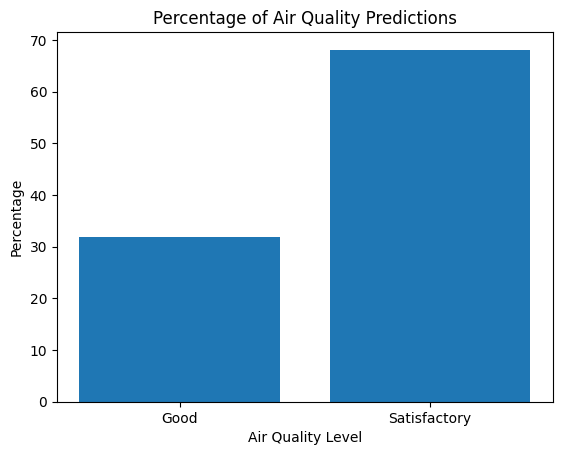

In [37]:
plt.bar(categories, percentages)
plt.xlabel('Air Quality Level')
plt.ylabel('Percentage')
plt.title('Percentage of Air Quality Predictions')
plt.show()
# The model predicted that that 30% of the air quality index  belonged to good level and the rest belonged to satisfactory level